In [30]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import hvplot.pandas



In [31]:
# Loading the Dataset

df = pd.read_csv("miami-housing.csv")
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [32]:
# checking data types
df.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

In [35]:
#Preprocessing Data

# Handling Missing Values

df.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
SALE_PRC_str         0
dtype: int64

In [128]:
# Dividing sales price by 1000 for clarity in plot
df['SALE_PRC_K'] = df['SALE_PRC']/1000

In [127]:
df.hvplot.points(
    'LONGITUDE', 
    'LATITUDE',
    geo=True, 
    color='SALE_PRC_K',
    tiles='OSM',
    frame_width=900,
    frame_height=700,
    title='MIAMI HOUSING PRICES IN THOUSANDS',
    
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (SALE_PRC_K)

In [36]:

# Split the data into X (Independent Variables) and y (Dependent Variable)

y = df["SALE_PRC"]

X = df.drop(columns= ["LATITUDE", "LONGITUDE", "PARCELNO", "SALE_PRC"])



In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LND_SQFOOT         13932 non-null  int64  
 1   TOT_LVG_AREA       13932 non-null  int64  
 2   SPEC_FEAT_VAL      13932 non-null  int64  
 3   RAIL_DIST          13932 non-null  float64
 4   OCEAN_DIST         13932 non-null  float64
 5   WATER_DIST         13932 non-null  float64
 6   CNTR_DIST          13932 non-null  float64
 7   SUBCNTR_DI         13932 non-null  float64
 8   HWY_DIST           13932 non-null  float64
 9   age                13932 non-null  int64  
 10  avno60plus         13932 non-null  int64  
 11  month_sold         13932 non-null  int64  
 12  structure_quality  13932 non-null  int64  
 13  SALE_PRC_str       13932 non-null  object 
dtypes: float64(6), int64(7), object(1)
memory usage: 1.5+ MB


In [38]:
#Visualizing the data

X.head()

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC_str
0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,440000.00
1,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,349000.00
2,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,800000.00
3,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,988000.00
4,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,755000.00


In [39]:
#Splitting the Data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [40]:
#Standarize the Data Set

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
train_data = X_train.join(y_train)

In [125]:
sorted_df = train_data.sort_values(by='SALE_PRC', ascending=True)


In [100]:
top_10_sales = sorted_df.nlargest(20,'SALE_PRC')
bottom_10_sales = sorted_df.nsmallest(20,'SALE_PRC')


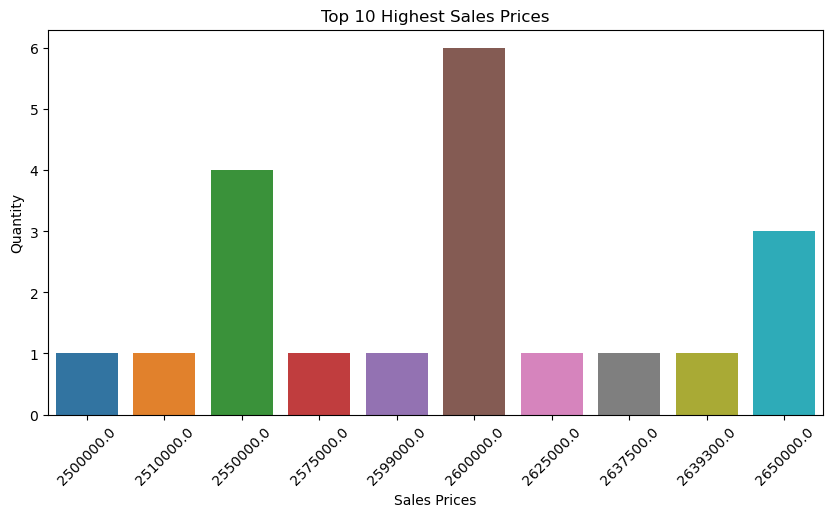

In [111]:
# plot visuals for highes 10 and bottom sales
plt.figure(figsize=(10,5))
sns.countplot(x="SALE_PRC",data=top_10_sales)
plt.xlabel('Sales Prices')
plt.ylabel('Quantity')
plt.title('Top 10 Highest Sales Prices')
plt.xticks(rotation=45)
plt.show()

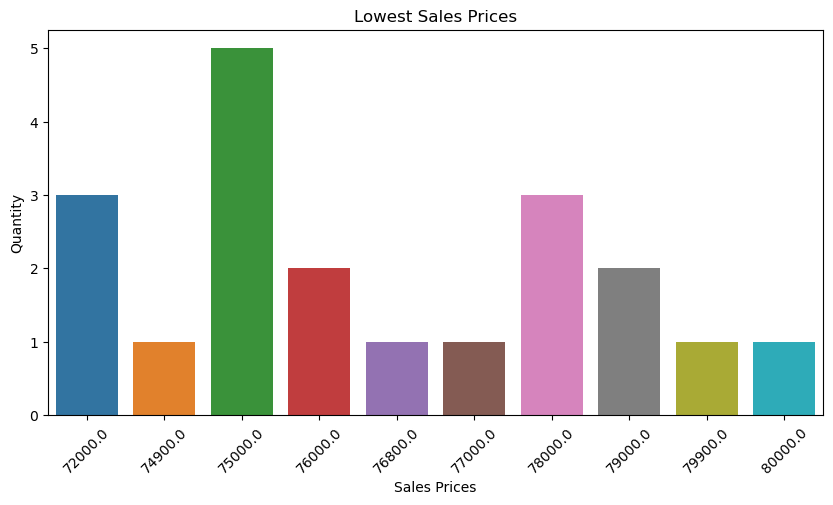

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x="SALE_PRC",data=bottom_10_sales)
plt.xlabel('Sales Prices')
plt.ylabel('Quantity')
plt.title('Lowest Sales Prices')
plt.xticks(rotation=45)
plt.show()

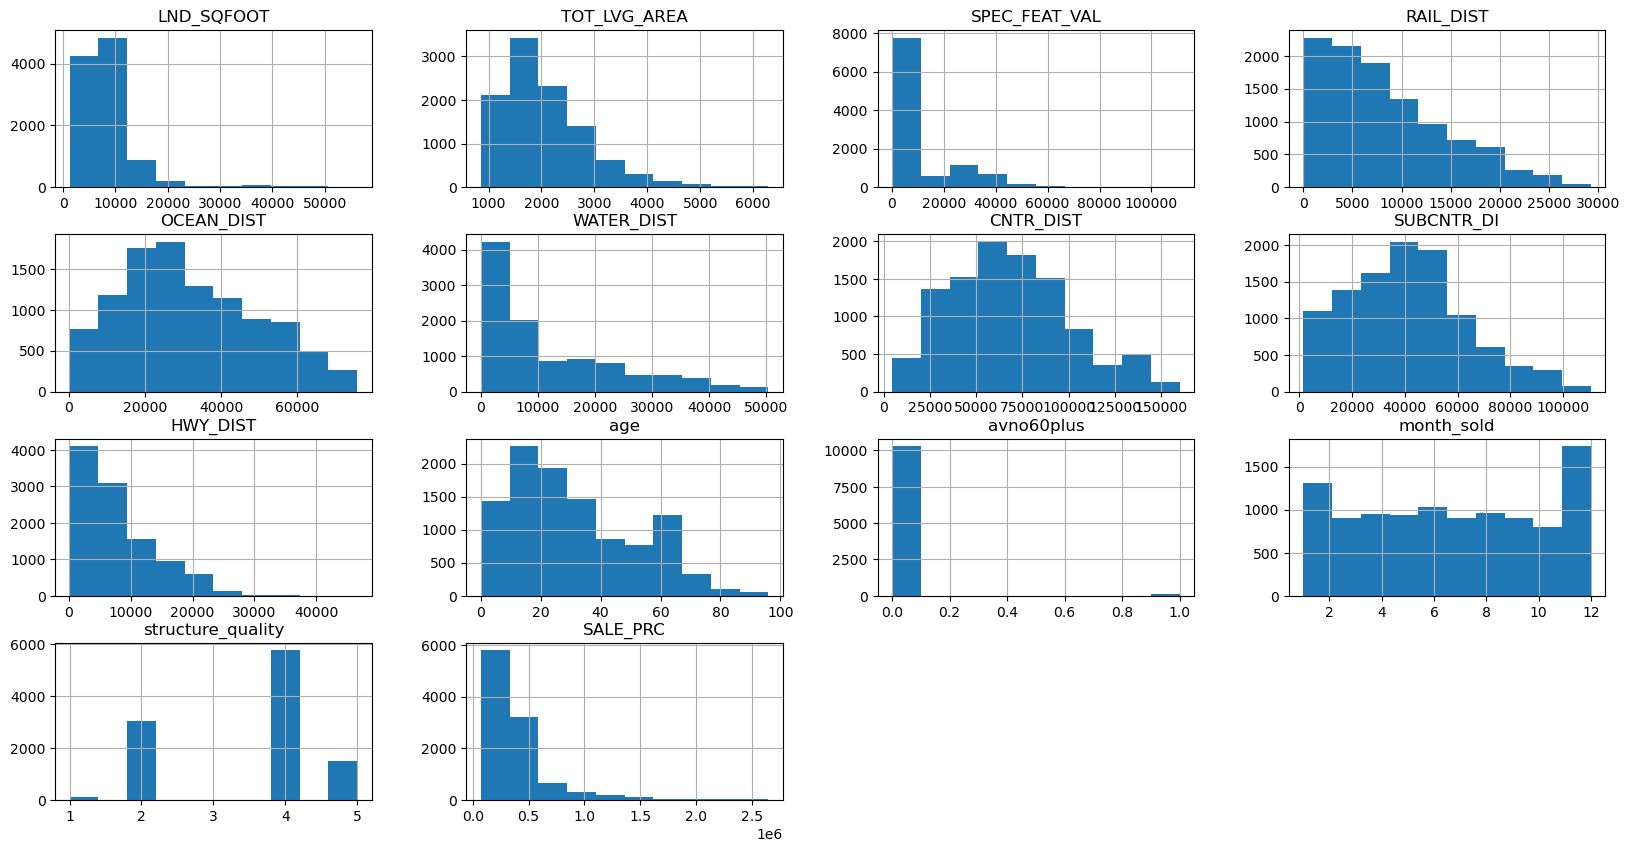

In [43]:
# train data histogram
train_data.hist(figsize=(20,10));

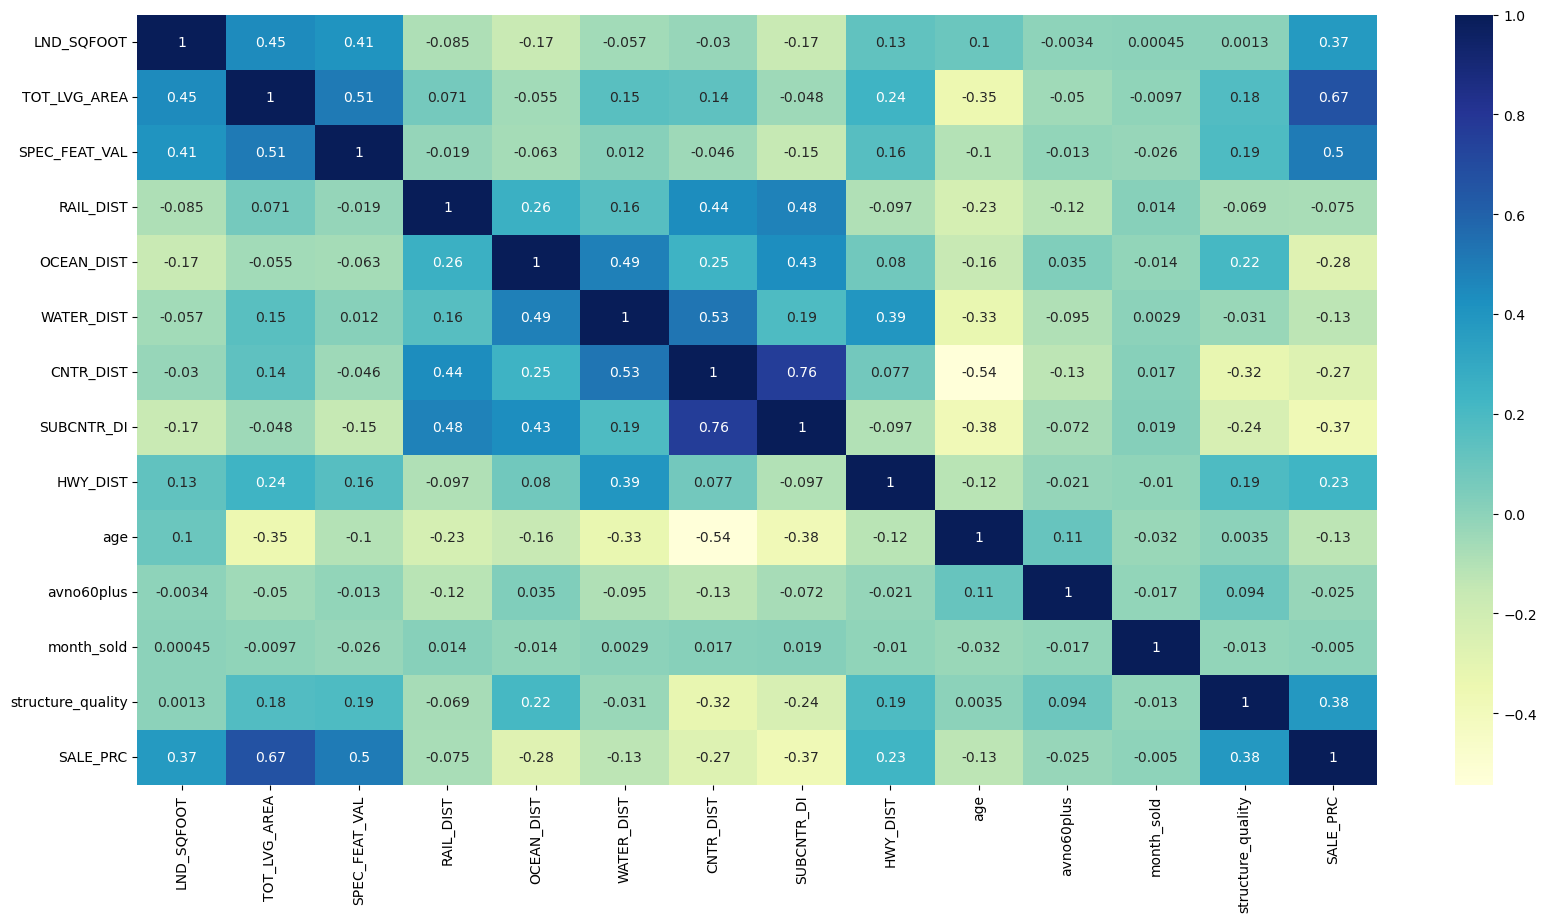

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu');

In [45]:
train_data['TOT_LVG_AREA'] = np.log(train_data['TOT_LVG_AREA'] + 1)
train_data['structure_quality'] = np.log(train_data['structure_quality'] + 1)
train_data['HWY_DIST'] = np.log(train_data['HWY_DIST'] + 1)
train_data['SPEC_FEAT_VAL'] = np.log(train_data['SPEC_FEAT_VAL'] + 1)

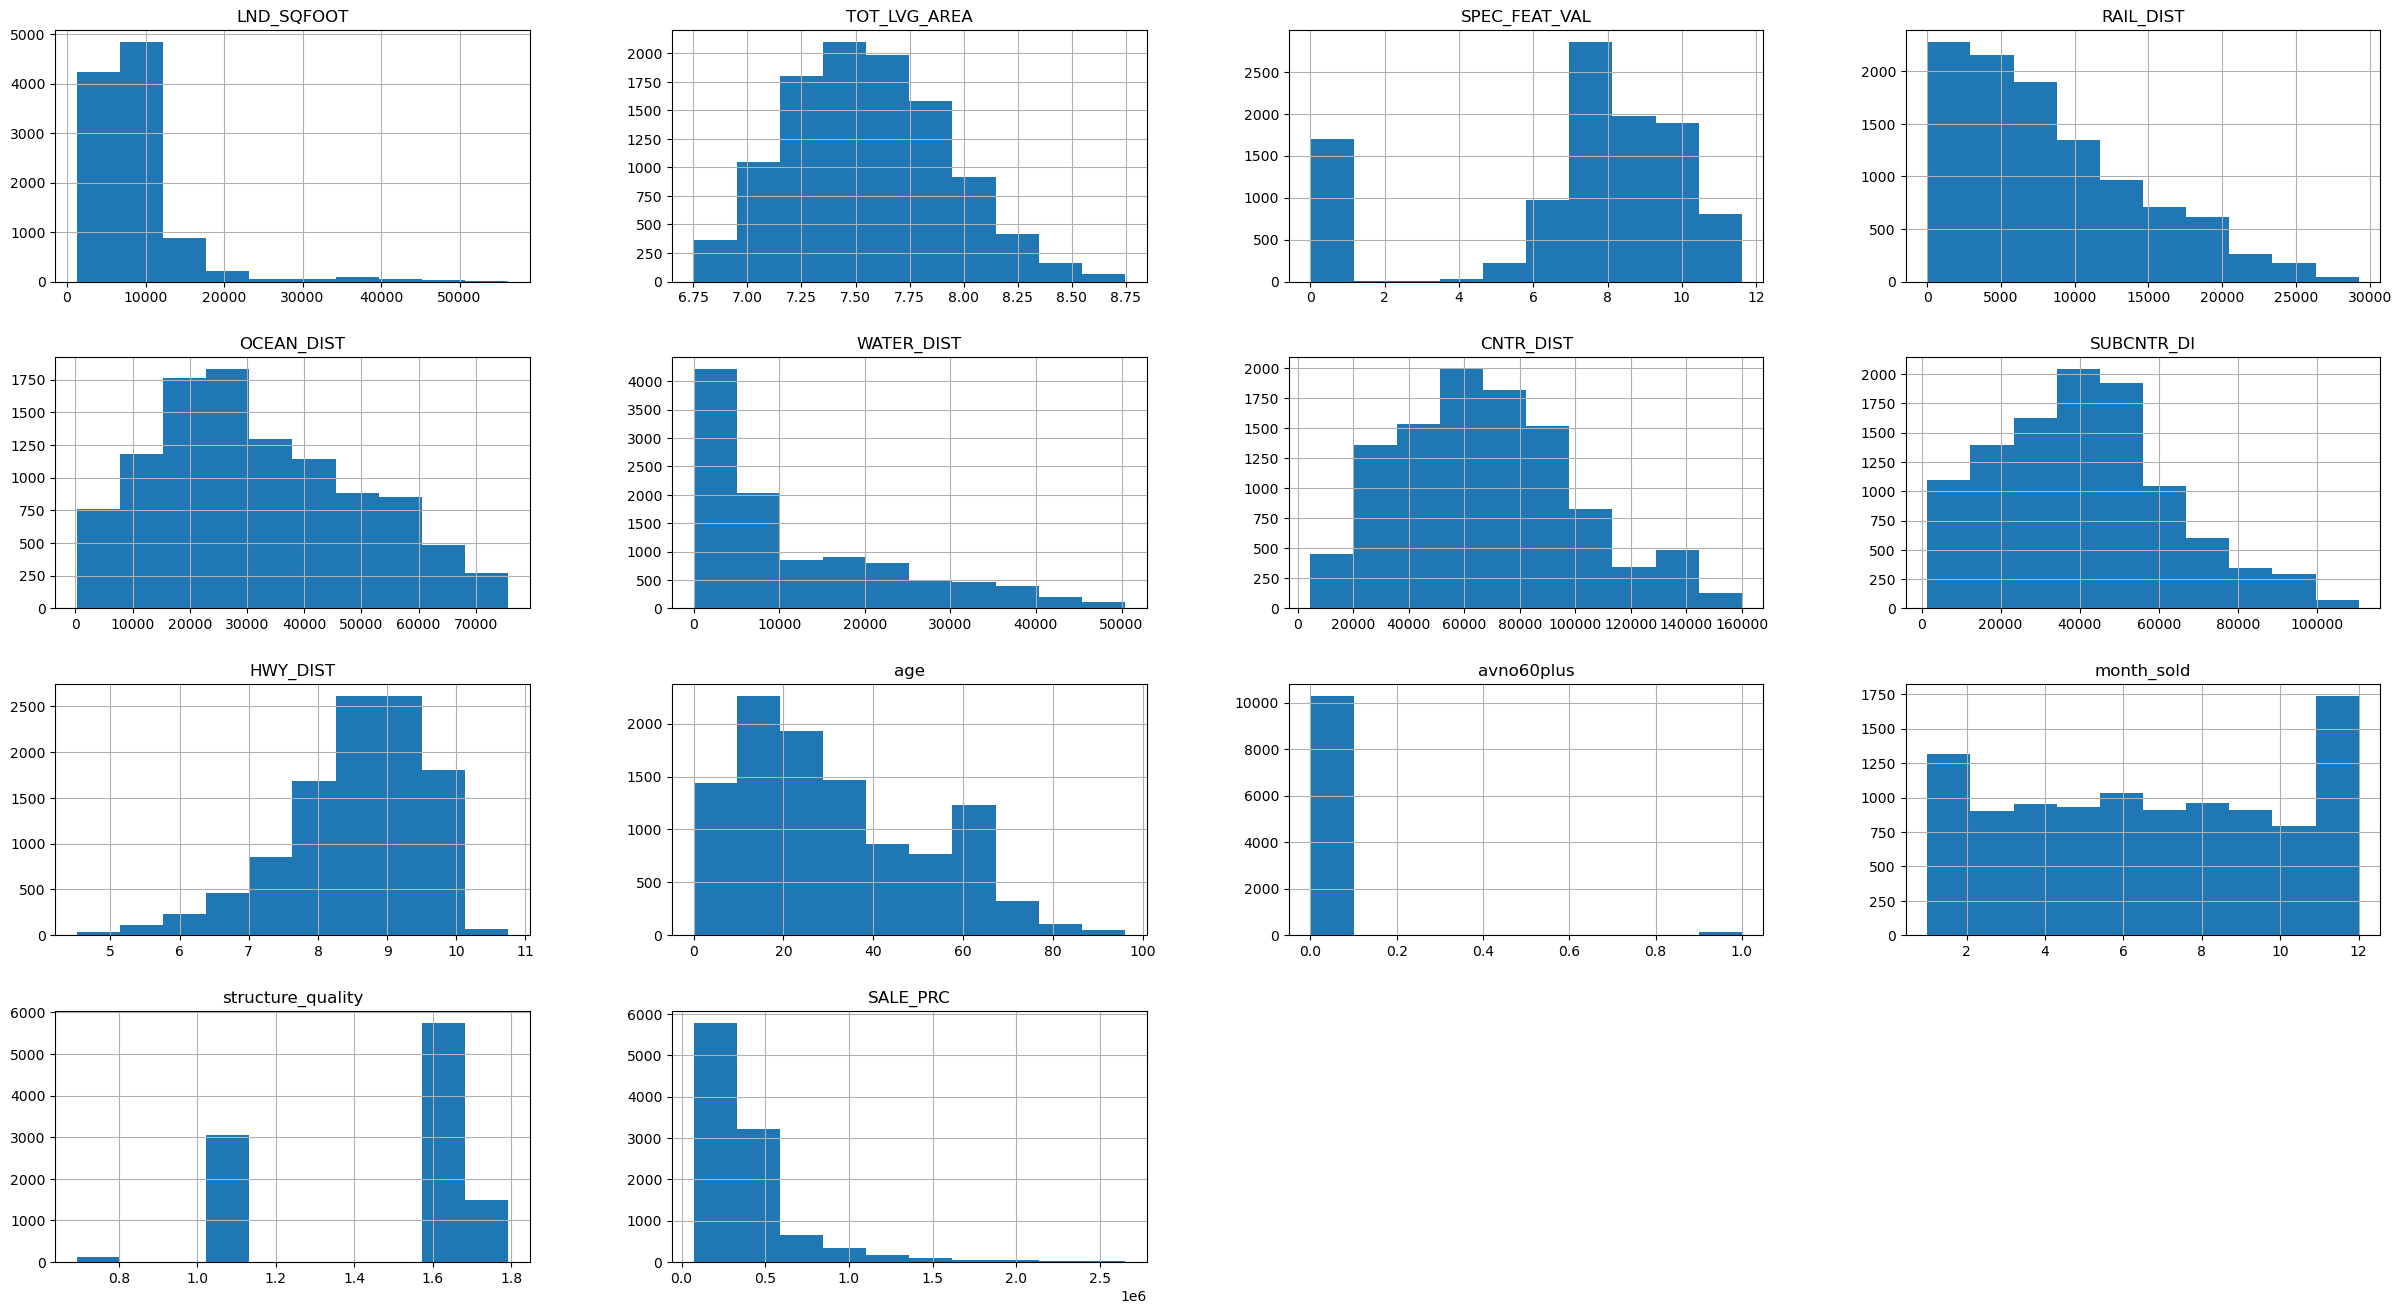

In [46]:
train_data.hist(figsize=(30,16));

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
X_train, y_train = train_data.drop(['SALE_PRC'], axis=1), train_data['SALE_PRC']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [49]:
test_data = X_test.join(y_test)

test_data['TOT_LVG_AREA'] = np.log(test_data['TOT_LVG_AREA'] + 1)
test_data['structure_quality'] = np.log(test_data['structure_quality'] + 1)
test_data['HWY_DIST'] = np.log(test_data['HWY_DIST'] + 1)
test_data['SPEC_FEAT_VAL'] = np.log(test_data['SPEC_FEAT_VAL'] + 1)

In [50]:
X_test, y_test = test_data.drop(['SALE_PRC'], axis=1), test_data['SALE_PRC']

In [51]:

reg.score(X_test, y_test)

1.0

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
forest.score(X_test, y_test)

0.9999902868914555

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
best_forest = grid_search.best_estimator_


In [56]:
best_forest.score(X_test, y_test)

0.999055511312095